Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [1]:
from sklearn.datasets import make_moons

In [4]:
data = make_moons(n_samples = 1000, noise = 0.5, random_state = 10)

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.5, random_state = 10)

In [14]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {'n_neighbors': range(1,21)},
    cv = KFold(n_splits = 5, shuffle = True, random_state = 10)
)

In [19]:
model.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [18]:
from sklearn.metrics import accuracy_score

In [20]:
print(accuracy_score(y_test, model.predict(x_test)))

0.8


# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [25]:
import matplotlib.pyplot as plt
import numpy as np

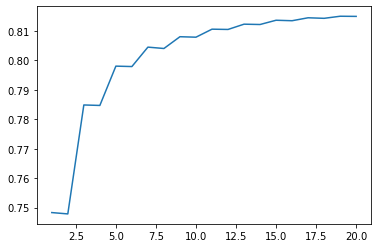

In [38]:
def train_grid_search(X, y):
    model = GridSearchCV(
        KNeighborsClassifier(),
        param_grid = {'n_neighbors': range(1,21)},
        #cv = KFold(n_splits = 5, shuffle = True),
        n_jobs = -1
    )
    model.fit(X,y)
    return model.cv_results_['mean_test_score']

mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [27]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"mv" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"mv" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [28]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

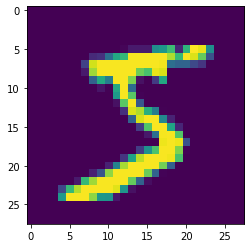

In [29]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [32]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 10)

In [36]:
KNS = KNeighborsClassifier(n_neighbors = 30)
KNS.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [37]:
print(accuracy_score(y_test, KNS.predict(x_test)))

0.956


# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?